In [ ]:
!pip install pandas scikit-learn nltk seaborn matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import random
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import ssl

%matplotlib inline

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

# Download required NLTK data
print("Downloading required NLTK data...")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
print("Download completed!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Download completed!


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Load the dataset
df = pd.read_csv('emotion_dataset.csv')

# Display first few rows
print("First few rows of the dataset:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
display(df.info())

# Display emotion distribution
print("\nEmotion Distribution:")
display(df['Emotion'].value_counts())

First few rows of the dataset:


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


None


Emotion Distribution:


,count
Emotion,
joy,11045
sadness,6722
fear,5410
anger,4297
surprise,4062
neutral,2254
disgust,856
shame,146


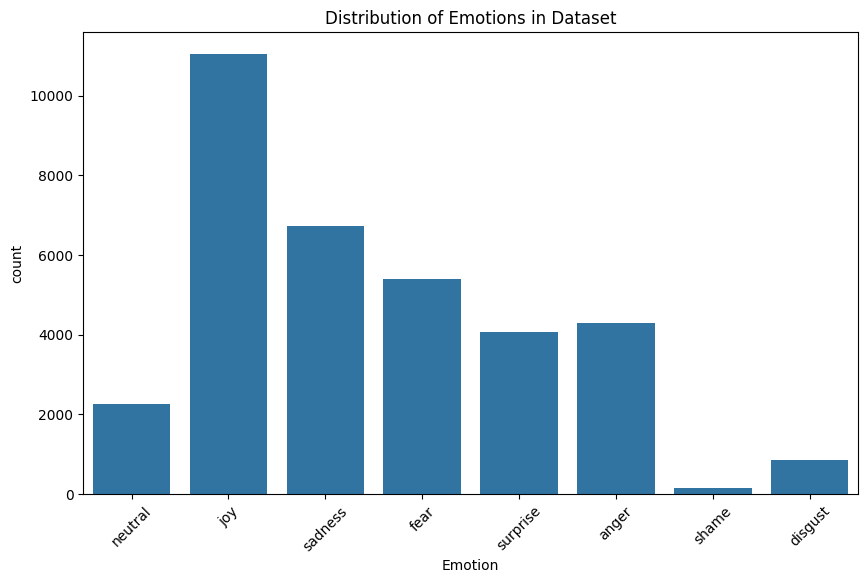

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Emotion')
plt.title('Distribution of Emotions in Dataset')
plt.xticks(rotation=45)
plt.show()

In [ ]:
class MLEmotionChatbot:
    def __init__(self):
        self.model = None
        self.responses = {
            'joy': [
                "I'm glad you're feeling happy! What's making you so cheerful?",
                "That's wonderful! Keep spreading that positive energy!",
                "Your happiness is contagious! Tell me more about it!"
            ],
            'sadness': [
                "I'm sorry you're feeling down. Would you like to talk about it?",
                "It's okay to feel sad sometimes. Is there anything specific bothering you?",
                "I'm here to listen if you want to share what's making you sad."
            ],
            'anger': [
                "I can sense that you're angry. Want to tell me what happened?",
                "Take a deep breath. Let's talk about what's bothering you.",
                "I understand you're frustrated. How can I help?"
            ],
            'fear': [
                "Try to take slow, deep breaths. What's making you anxious?",
                "It's normal to feel afraid sometimes. Would you like to talk about your concerns?",
                "I'm here to help you work through your fears. What's on your mind?"
            ],
            'neutral': [
                "How has your day been so far?",
                "Is there anything specific you'd like to talk about?",
                "I'm here if you need someone to talk to."
            ]
        }

    def preprocess_text(self, text):
        """Preprocess the input text"""
        text = str(text).lower().strip()
        return text

    def train_model(self, X, y):
        """Train the emotion detection model"""
        try:
            # Split the dataset
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2, random_state=42
            )

            # Create and train the pipeline
            self.model = Pipeline([
                ('tfidf', TfidfVectorizer(max_features=5000)),
                ('classifier', LinearSVC())
            ])

            # Fit the model
            self.model.fit(X_train, y_train)

            # Set trained flag
            self.is_trained = True

            # Calculate accuracies
            train_accuracy = self.model.score(X_train, y_train)
            test_accuracy = self.model.score(X_test, y_test)

            return train_accuracy, test_accuracy

        except Exception as e:
            print(f"Error during training: {str(e)}")
            self.is_trained = False
            return 0.0, 0.0

    def save_model(self, filename='emotion_model.pkl'):
        """Save the trained model to a file"""
        if not self.is_trained or self.model is None:
            raise ValueError("Model has not been trained yet. Please train the model first.")

        try:
            with open(filename, 'wb') as f:
                pickle.dump(self.model, f)
            print(f"Model successfully saved as {filename}")
            return True
        except Exception as e:
            print(f"Error saving model: {str(e)}")
            return False

    def load_model(self, filename='emotion_model.pkl'):
        """Load a trained model from a file"""
        try:
            with open(filename, 'rb') as f:
                self.model = pickle.load(f)
            self.is_trained = True
            print("Model successfully loaded")
            return True
        except Exception as e:
            print(f"Error loading model: {str(e)}")
            self.is_trained = False
            return False

    def detect_emotion(self, text):
        """Detect emotion from text"""
        if self.model is None:
            return 'neutral'
        processed_text = self.preprocess_text(text)
        predicted_emotion = self.model.predict([processed_text])[0]
        return predicted_emotion

    def get_response(self, user_input):
        """Get chatbot response based on detected emotion"""
        emotion = self.detect_emotion(user_input)
        # If emotion not in responses, use neutral
        if emotion not in self.responses:
            emotion = 'neutral'
        response = random.choice(self.responses[emotion])
        return emotion, response


In [ ]:
print("Preparing data...")
X = df['Clean_Text'] if 'Clean_Text' in df.columns else df['Text']
y = df['Emotion']

# Clean the data
mask = X.notna()
X = X[mask]
y = y[mask]

# Create and train chatbot
print("Training model...")
chatbot = MLEmotionChatbot()
train_accuracy, test_accuracy = chatbot.train_model(X, y)

print(f"\nTraining accuracy: {train_accuracy:.2f}")
print(f"Testing accuracy: {test_accuracy:.2f}")

# Test the chatbot
test_sentences = [
    "I'm so happy today!",
    "I'm feeling really sad and down",
    "This makes me so angry!",
    "I'm worried about my upcoming exam",
    "The weather is nice today"
]

print("\nTesting chatbot responses:\n")
for sentence in test_sentences:
    try:
        emotion, response = chatbot.get_response(sentence)
        print(f"Input: {sentence}")
        print(f"Detected emotion: {emotion}")
        print(f"Response: {response}\n")
    except Exception as e:
        print(f"Error processing: {sentence}")
        print(f"Error message: {str(e)}\n")

Preparing data...
Training model...

Training accuracy: 0.79
Testing accuracy: 0.62

Testing chatbot responses:

Input: I'm so happy today!
Detected emotion: joy
Response: Your happiness is contagious! Tell me more about it!

Input: I'm feeling really sad and down
Detected emotion: sadness
Response: I'm here to listen if you want to share what's making you sad.

Input: This makes me so angry!
Detected emotion: anger
Response: Take a deep breath. Let's talk about what's bothering you.

Input: I'm worried about my upcoming exam
Detected emotion: fear
Response: I'm here to help you work through your fears. What's on your mind?

Input: The weather is nice today
Detected emotion: joy
Response: That's wonderful! Keep spreading that positive energy!



In [ ]:
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def form_chat():
    form = widgets.VBox([
        widgets.HTML(value="<h3>Emotion Chatbot</h3>"),
        widgets.Text(
            value='',
            placeholder='Type your message here...',
            description='You:',
            layout={'width': '500px'}
        ),
        widgets.Button(
            description='Send',
            button_style='primary',
            layout={'width': '100px'}
        ),
        widgets.HTML(value="<p>Type 'quit' to exit</p>"),
        widgets.Output(layout={'border': '1px solid black', 'padding': '10px', 'height': '300px', 'overflow_y': 'auto'})
    ])

    text_input = form.children[1]
    send_button = form.children[2]
    chat_output = form.children[4]

    chat_history = []

    def on_button_click(b):
        message = text_input.value
        text_input.value = ''

        with chat_output:
            if message.lower() == 'quit':
                print("Bot: Goodbye! Take care!")

                analyze_chat(chat_history)
                return

            try:
                emotion, response = chatbot.get_response(message)
                print(f"You: {message}")
                print(f"Bot: [{emotion}] {response}\n")

                chat_history.append({
                    'user_input': message,
                    'emotion': emotion,
                    'response': response,
                    'message_length': len(message)
                })
            except Exception as e:
                print(f"Bot: Sorry, I encountered an error: {str(e)}")

    send_button.on_click(on_button_click)
    text_input.on_submit(lambda x: on_button_click(None))

    with chat_output:
        print("Bot: Hi! I'm here to chat. How are you feeling today? (type 'quit' to exit)")

    display(form)
    return chat_history

def analyze_chat(chat_history):
    if not chat_history:
        print("No chat history to analyze.")
        return

    df = pd.DataFrame(chat_history)

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    emotion_counts = df['emotion'].value_counts()
    emotion_counts.plot(kind='bar')
    plt.title('Emotion Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='message_length', bins=20)
    plt.title('Message Length Distribution')
    plt.xlabel('Message Length')
    plt.ylabel('Count')

    plt.subplot(2, 2, 3)
    emotion_mapping = {emotion: i for i, emotion in enumerate(df['emotion'].unique())}
    df['emotion_num'] = df['emotion'].map(emotion_mapping)
    plt.plot(range(len(df)), df['emotion_num'], marker='o')
    plt.title('Emotion Change Over Time')
    plt.xlabel('Message Number')
    plt.ylabel('Emotion')
    plt.yticks(range(len(emotion_mapping)), emotion_mapping.keys(), rotation=45)

    plt.tight_layout()
    plt.show()

    print("\n📊 Chat Analysis Summary:")
    print(f"Total messages: {len(df)}")
    print(f"Average message length: {df['message_length'].mean():.1f} characters")
    print(f"Most common emotion: {df['emotion'].mode().iloc[0]}")

    print("\n🔄 Emotion Transitions:")
    transitions = []
    for i in range(len(df)-1):
        transitions.append(f"{df['emotion'].iloc[i]} → {df['emotion'].iloc[i+1]}")

    common_transitions = Counter(transitions).most_common(3)
    print("Most common emotion transitions:")
    for transition, count in common_transitions:
        print(f"  {transition}: {count} times")

    print("\n🔍 Keyword Analysis:")
    all_words = ' '.join(df['user_input']).lower().split()
    word_freq = Counter(all_words).most_common(5)
    print("Most common words used:")
    for word, count in word_freq:
        if len(word) > 3:
            print(f"  '{word}': {count} times")



In [ ]:
chat_history = form_chat()

In [ ]:
def show_chat_history(chat_history):
    if chat_history:
        df = pd.DataFrame(chat_history)
        print("\nChat History:")
        display(df)
    else:
        print("No chat history yet.")

show_chat_history(chat_history)


Chat History:


,user_input,emotion,response,message_length
0,i feel good today,joy,I'm glad you're feeling happy! What's making y...,17
1,but yesterday i lost my cat,sadness,I'm sorry you're feeling down. Would you like ...,27
2,i'm worry about it,fear,It's normal to feel afraid sometimes. Would yo...,18
3,maybe it will find the way home,neutral,Is there anything specific you'd like to talk ...,31
